# Semantic parsing
## Ádám Kovács 
### adam.kovacs@tuwien.ac.at
### March 31, 2021

## Semantic parsing

-   State-of-the-art systems almost explicitly use word embeddings
    (vectors of few hundred dimensions) to model the semantic of raw
    text [_Mikolov:2013_](https://arxiv.org/abs/1301.3781)


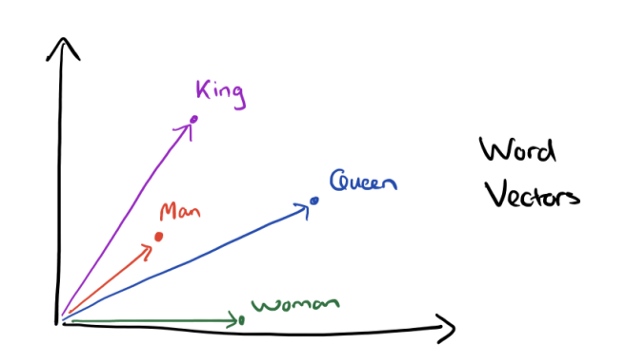

-   Since [_Vaswani:2017_](https://arxiv.org/abs/1706.03762), contextualized embeddings([_BERT_](https://arxiv.org/abs/1810.04805), [_ALBERT_](https://arxiv.org/abs/1909.11942), [_RoBERTa_](https://arxiv.org/abs/1907.11692), ..) have become the mainstream way to
    model semantic representations in modern tasks (Question answering,
    Chatbots, Relation Extraction, etc..)

-  E.g. _Cold_ has different meaning in different contexts (unfriendly, temperature..) 

- These embeddings are learned via deep neural networks

-   But deep neural networks are barely interpretable, their decisions are
    hard to explain and prone to bias ([_Alt:2020_](https://arxiv.org/abs/2004.14855), [_Glockner:2018_](https://arxiv.org/abs/1805.02266), [_Gururangan:2018_](https://arxiv.org/abs/1803.02324))

## Explainable models for semantic parsing

- The weights of deep learning models are hard to interpret and explain ([_Serrano:2019_](https://arxiv.org/abs/1906.03731), [_Jain:2019_](https://arxiv.org/abs/1902.10186))

- Explainable AI (XAI) [_Danilevsky:2020_](https://www.aclweb.org/anthology/2020.aacl-main.46/) is an emerging field

- Modeling meaning as semantic graphs provides an explicit and explainable method.

- Semantic graphs are not new: [WordNet](https://wordnet.princeton.edu/), [AMR](https://www.aclweb.org/anthology/W13-2322/), [PropBank](https://www.aclweb.org/anthology/J05-1004.pdf), [UCCA](https://universalconceptualcognitiveannotation.github.io/)

- But it usually requires a large amount of training data to build them correctly 

## Semantic parsing
### 4lang
- Developed in _Kornai:2012,Kornai:2015a,Kornai:2019_ 
- and partially implemented in _Recski:2016d,Recski:2018_

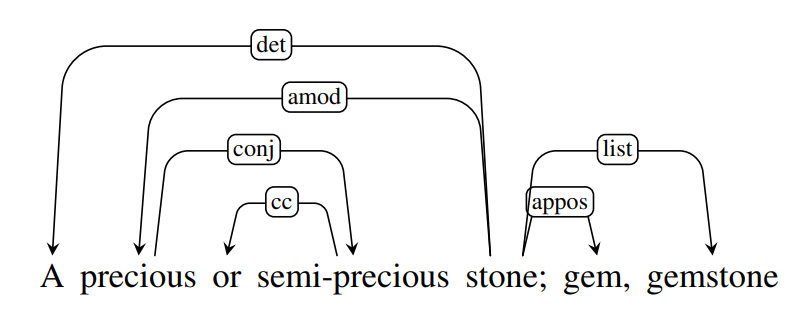

<img src="img/jewel.png"/>

### How?
- We convert UD substructures to 4lang subgraphs. E.g. amod and advmod are mapped to 0-edges but obj and nsubjpass are mapped to 2-edges.
- Our method is rule-based and language independent as long as we have a UD parser
- We build the UD graphs and use [IRTG](http://www.coli.uni-saarland.de/~koller/papers/irtg-sgraph-15.pdf) (Interpreted Regular Tree Grammars) rules to convert to 4lang graphs
- IRTG has a parser called [alto](https://github.com/coli-saar/alto)

-   __0-edges__

    -   unary predication $$dog\xrightarrow{0}bark$$

    -   attribution  $$dog\xrightarrow{0}four-legged$$

    -   hypernymy, or the IS_A relation $$dog\xrightarrow{0}mammal$$

-   __1- and 2-edges__

    -   transitive verbs $$cat\xleftarrow{1}catch\xrightarrow{2}mouse$$

    -   a small set of binary primitives $$tree\xleftarrow{1}HAS\xrightarrow{2}branch$$

### Example mapping using rules

__IRTG Rule__


    NOUN -> NOUN_AMOD_ADJ(NOUN, ADJ)
    [ud] f_dep1(merge(merge(?1,"(r<root> :AMOD (d1<dep1>))"), 
        r_dep1(?2)))
    [4lang] f_dep1(merge(merge(?1,"(r<root> :0 (d1<dep1>))"),
         r_dep1(?2)))



<div class="frame" align="center">
<img src="img/1a.png"/ width="700">
<img src="img/1b.png"/ width="400">
</div>

### Expand
- We can optionally _expand_ the nodes in the 4lang graphs with their definitions. The definitions are scraped from _Wiktionary_
- Example: Homework defined as _Work that is done at home._

<div class="frame" align="center">
<img src="img/graph.png"/>
</div>

## Explainable lexical entailment

-   Lexical entailment - recognizing `IS_A` relationships between pairs
    of words (lettuce-food)

-   We made experiments on two datasets

-   [Semeval-2020 lexical entailment task](https://www.aclweb.org/anthology/2020.semeval-1.2/)

-   `SherLIiC` lexical inference dataset of typed predicates [_Schmitt:2019_](https://arxiv.org/abs/1906.01393)

    -   *run* entails *lead* if its arguments are of type PERSON and
        COMPANY (e.g., *Bezos runs Amazon*)

-   Stand-alone fully interpretable model

-   Combined with other systems, our methods achieve improvements on
    previous SOTA systems

### Semeval
- We build entailment graphs
- We expand graphs recursively
- We then define entailment if there is a directed path of 0-edges leading from the premise word to the hypothesis word
- Nose - Face (A protuberance on the face)
- We combine this system with a method based on WordNet
- We have published our system at Semeval

| **System**    |    **en** |    **de** |    **it** |
|:--------------|----------:|----------:|----------:|
| GLEN baseline |     79.87 |     59.88 |     66.27 |
| BMEAUT        | **91.77** |     67.00 | **81.41** |
| FERRYMAN      |     72.13 |     53.12 |     62.71 |
| SHIKEBLCU     |     87.90 | **71.43** |     75.94 |

Official monolingual LE results on the `ANY` track (F-scores)

### SherLliC

- The method is similar to the method for the Semeval dataset - _we build entailment graphs_
- The dataset is harder - _phrases_
- New methods were also needed - _edge similarity, inheriting zero edges, reducing graphs_
- We submitted a paper to [Natural Language Engineering](https://www.cambridge.org/core/journals/natural-language-engineering)

| **Method**          |     **P** |    **R** |     **F** |
|:--------------------|----------:|---------:|----------:|
| always yes          |      33.3 |      100 |      49.9 |
| Berant II           |      77.4 |     18.6 |      30.0 |
| PPDB                |      62.1 |     24.0 |      34.7 |
| WordNet             |      38.8 |     35.7 |      37.2 |
| 4lang\_high\_prec   | **89.06** |    11.46 |     20.32 |
| 4lang\_high\_fscore |     44.65 |    52.51 |     48.26 |
| all rules           |      39.7 |     49.9 |      44.2 |
| \+ WordNet          |      37.2 |     62.6 |      46.6 |
| \+ 4lang            |     38.44 |    71.93 |     50.10 |
| ESIM                |      39.0 | **83.3** |      53.1 |
| w2v + tsg\_rel\_emb |      51.8 |     72.7 |      60.5 |
| ALBERT              |      70.0 |    76.35 |  **73.0** |
| \+ 4lang            |     69.79 |    76.96 | **73.20** |

## Softwares and publications

- The __Semeval__ paper is available here: https://www.aclweb.org/anthology/2020.semeval-1.15/ 
    - _BMEAUT at SemEval-2020 Task 2: Lexical Entailment with Semantic Graphs: Ádám Kovács, Kinga Gémes, Andras Kornai, Gábor Recski_
    - The code is available in [Github](https://github.com/adaamko/wikt2def/tree/semeval) under an MIT license
- We have submitted a journal paper to __NLE__, it is currently under review. 
    - _Explainable lexical entailment with semantic graphs: Ádám Kovács, Kinga Gémes, Andras Kornai, Gábor Recski_
    - The code is also [available](https://github.com/adaamko/wikt2def/tree/nle)
- We also have a demo: https://ir-group.ec.tuwien.ac.at/fourlang/

## BRISE

-   BRISE [1] [2] is a smart city project of the City of Vienna

-   For the sentence "Die Gebäudehöhe darf 6,5 m nicht überschreiten."
    (The building height must not exceed 6.5 m.)

-   attribute GebaeudeHoeheMax (BuildingHeightMax)

    <img src="img/graph_brise.png" id="fig:lexinf_graph" alt="image" />


[1] https://www.uia-initiative.eu/en/uia-cities/vienna-call4

[2] https://digitales.wien.gv.at/site/projekt/brisevienna/

- We also select types and values for the attributes
- __Sentence__: Bei einer Straßenbreite ab 10 m sind Gehsteige mit einer Breite von mindestens 2,0 m herzustellen.
- __attributes__:
    - __Name__: GehsteigbreiteMin, __Value__: 2,0m, __Type__: content
    - __Name__: StrassenbreiteMin, __Value__: 10m, __Type__: condition
- Convert to logical form to create an assumption set: 
    - <span style="color:red">obl(gehsteigbreiteMin(200), strassenbreiteMin(1000))</span>.

- We have submitted a paper to [_ICAIL21: 18th International Conference on Artificial Intelligence and Law_](http://www.iaail.org/?q=article/icail-2021-18th-international-conference-artificial-intelligence-and-law-call-papers)
- Explainable rule extraction via semantic graphs: Gabor Recski, Adam Kovacs, Björn Lellmann, Allan Hanbury
- We will also release the code in GitHub under MIT licence
- Part of it is available at: https://github.com/recski/tuw-nlp
- Demo is available: https://ir-group.ec.tuwien.ac.at/brise-extract/

## Ongoing research

- Use semantic graphs as features in a ML framework
- Use a dataset with sufficient training data
- [Semeval 2010 Relation extraction dataset](https://paperswithcode.com/sota/relation-extraction-on-semeval-2010-task-8)
- Train a classification algorithm to determine the important features

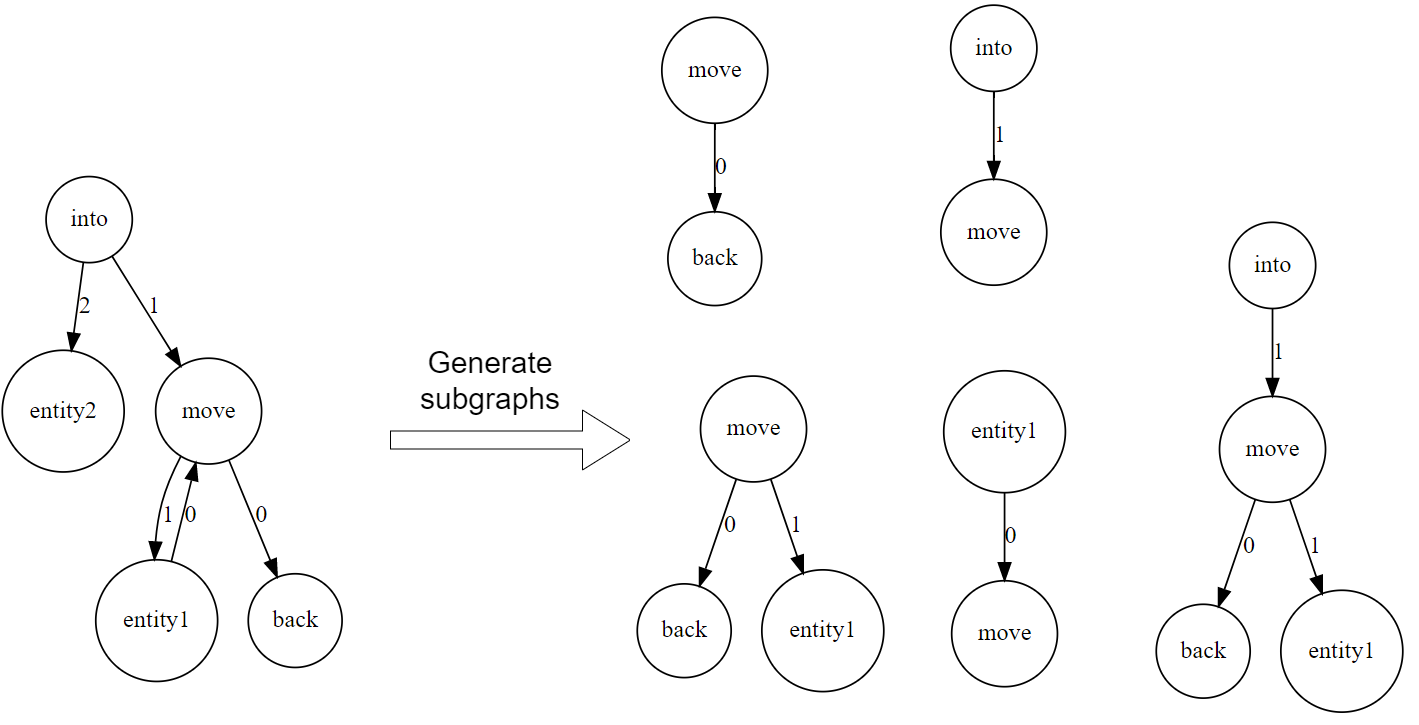

- Use weights to determine what are the important subgraphs in the task
- Convert these subgraphs into a "ruleset"
- We use ML to "learn" rules
- We have some preliminary results

__For the Entity-Destination class:__

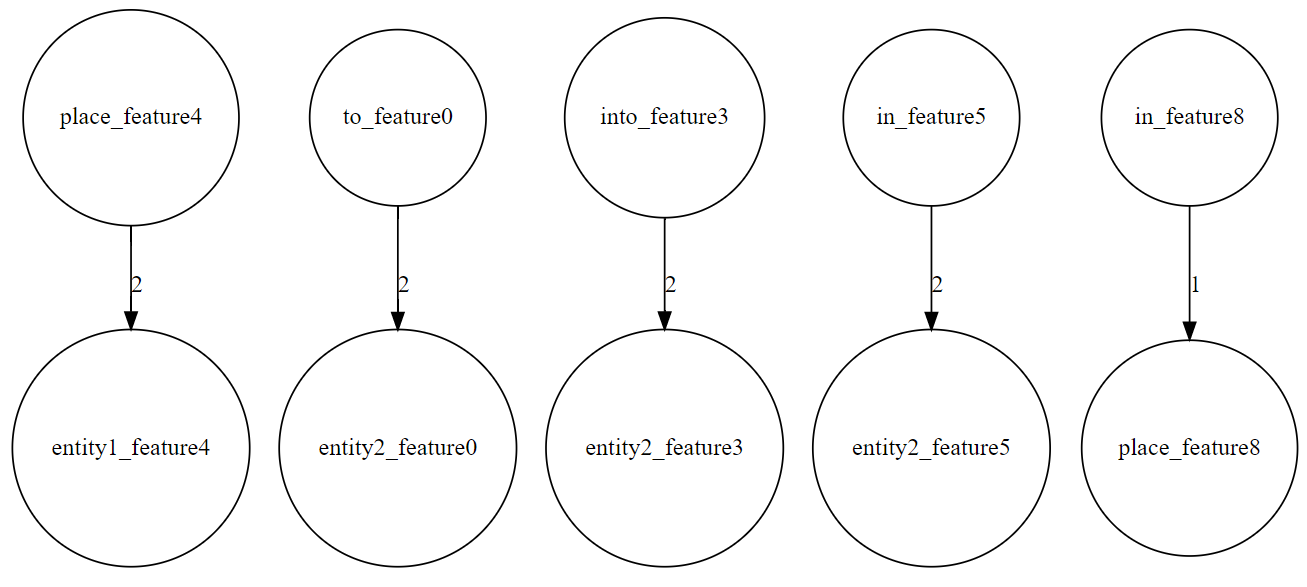